In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'time[s]')

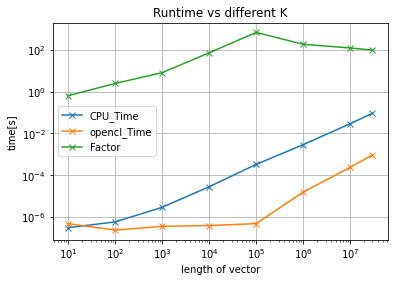

In [4]:
N = [10,100, 1000, 10000, 100000, 1000000, 10000000, 30000000]
CPU_time = [3e-07, 5.7e-07, 2.85e-06, 2.759e-05, 0.00032447, 0.00286088, 0.0289263, 0.0921195]
opencl_time = [4.7e-07,2.3e-07, 3.5e-07, 3.8e-07, 4.7e-07, 1.523e-05, 0.00023278, 0.00093314]
factor = [0.638298, 2.47826, 8.14286, 72.6053, 690.362, 187.845, 124.265, 98.7199]


plt.loglog(N,CPU_time, label = "CPU_Time", marker='x')
plt.loglog(N,opencl_time, label = "opencl_Time", marker='x')
plt.loglog(N,factor, label = "Factor", marker='x')
plt.legend()
plt.grid()
plt.title("Runtime dotProduct")
plt.xlabel("length of vector")
plt.ylabel("time[s]")
plt.savefig("Bilder/Runtime_dotProduct")